# Segmentación de clientes

In [1]:
# Importamos las librerias necesarias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
#import plotly.io as pio
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")


## EDA

In [2]:
#Dimensiones del conjunto de datos
data = pd.read_csv("https://github.com/PabloJRW/segemntacion_clientes-basico/raw/main/Mall_Customers.csv")
print('Dimensiones del df:', data.shape)

Dimensiones del df: (200, 5)


In [3]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
# Eliminamos variables
data.drop(["CustomerID","Gender"], axis=1, inplace=True)
# Renombramos variables
data.columns = ['age', 'annual_income', 'spending_score']

Veamos gráficamente nuestros datos para observar su dispersión.

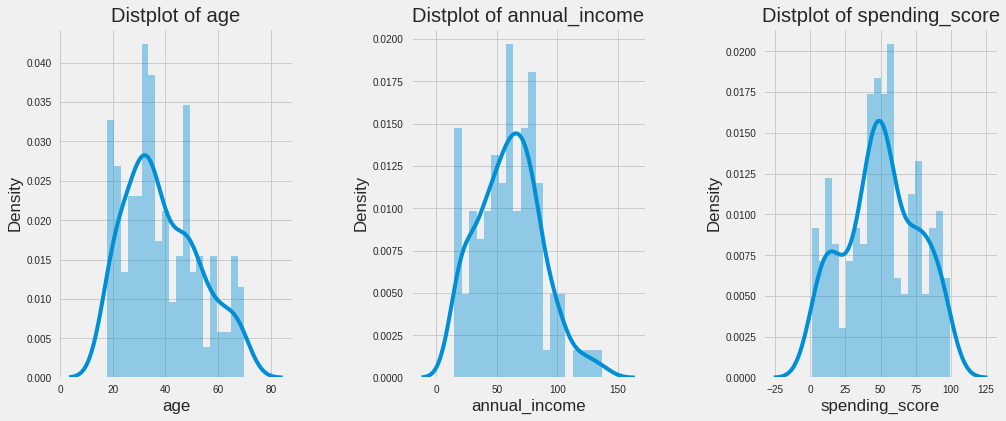

In [5]:
# Distribución de nuestras 3 variables
# =========================================================================
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['age', 'annual_income', 'spending_score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))


## Modelo (K-means)

El siguiente paso será normalizar las variables para que todas estén en una misma escala y no afecte el cálculo de la distancia entre puntos:

In [6]:
# Normalizamos nuestras variables
# ======================================================================
X = data.copy()
X1 = preprocessing.normalize(X)

### Elegir K (número de conglomerados)

Veamos cuántos segmentos puede encontrar el algoritmo en nuestro conjunto de datos. Para ello, utilizaremos el método de codo.

El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster. Cuanto más grande es el número de clusters k, la varianza intra-cluster tiende a disminuir.

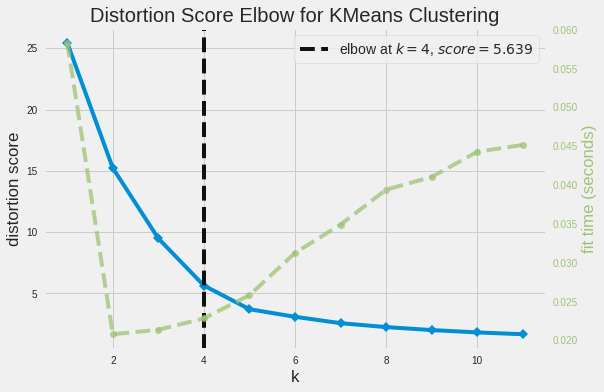

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X1)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

## Entrenamiento del modelo

### 4 Segmentos

In [8]:
kmedia_4k = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                 tol=0.0001,  random_state= 111  , algorithm='elkan')
kmedia_4k.fit(X1)
labels_4k = kmedia_4k.labels_   # Etiqueta de cluters
centroides = kmedia_4k.cluster_centers_   # Centroides de clusters

data['clusters_4k'] =  labels_4k

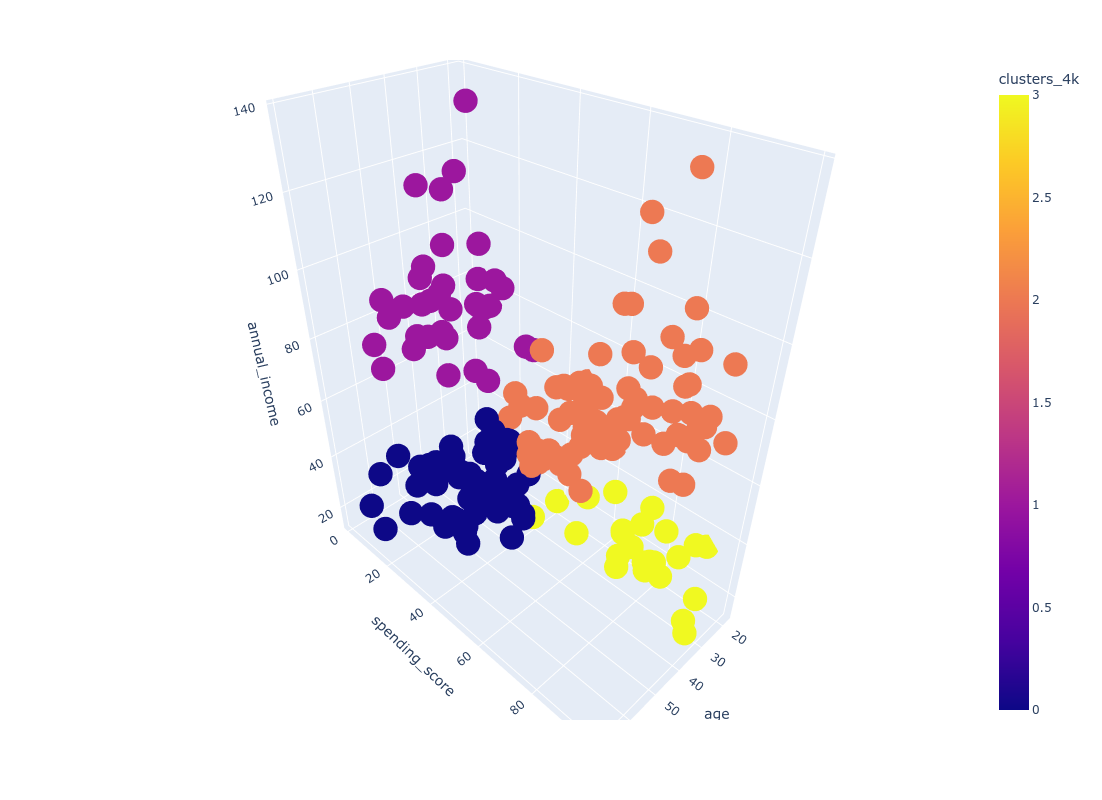

In [9]:
# Plot con 4 segmentos de clientes

fig = px.scatter_3d(data, x='age', y='spending_score', z='annual_income',color='clusters_4k', width=800, height=800)
#fig.write_html("/work/clustering-clientes/file4k.html")
fig.write_html("file4k.html")
fig.show()

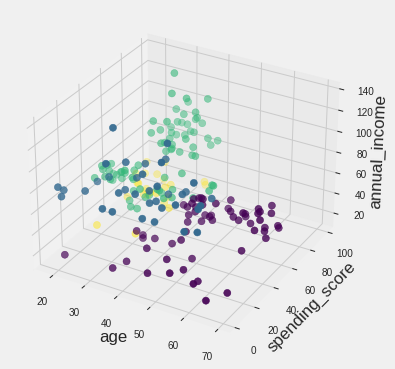

In [10]:
# El gráfico 3D interactivo anterior no se muestra en GitHub
# Por eso, el siguiente gráfico
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')

x = data['age']
y = data['spending_score']
z = data['annual_income']

ax.set_xlabel("age")
ax.set_ylabel('spending_score')
ax.set_zlabel("annual_income")

ax.scatter(x, y, z, c=labels_4k, s= 50, cmap='viridis')

plt.show()

### 5 Segmentos

In [11]:
kmedia_5k = KMeans(n_clusters = 5
 ,init='k-means++', n_init = 10 ,max_iter=300, 
                 tol=0.0001,  random_state= 111  , algorithm='elkan')
kmedia_5k.fit(X1)
labels_5k = kmedia_5k.labels_   # Etiqueta de cluters
centroides = kmedia_5k.cluster_centers_   # Centroides de clusters

data['clusters_5k'] =  labels_5k

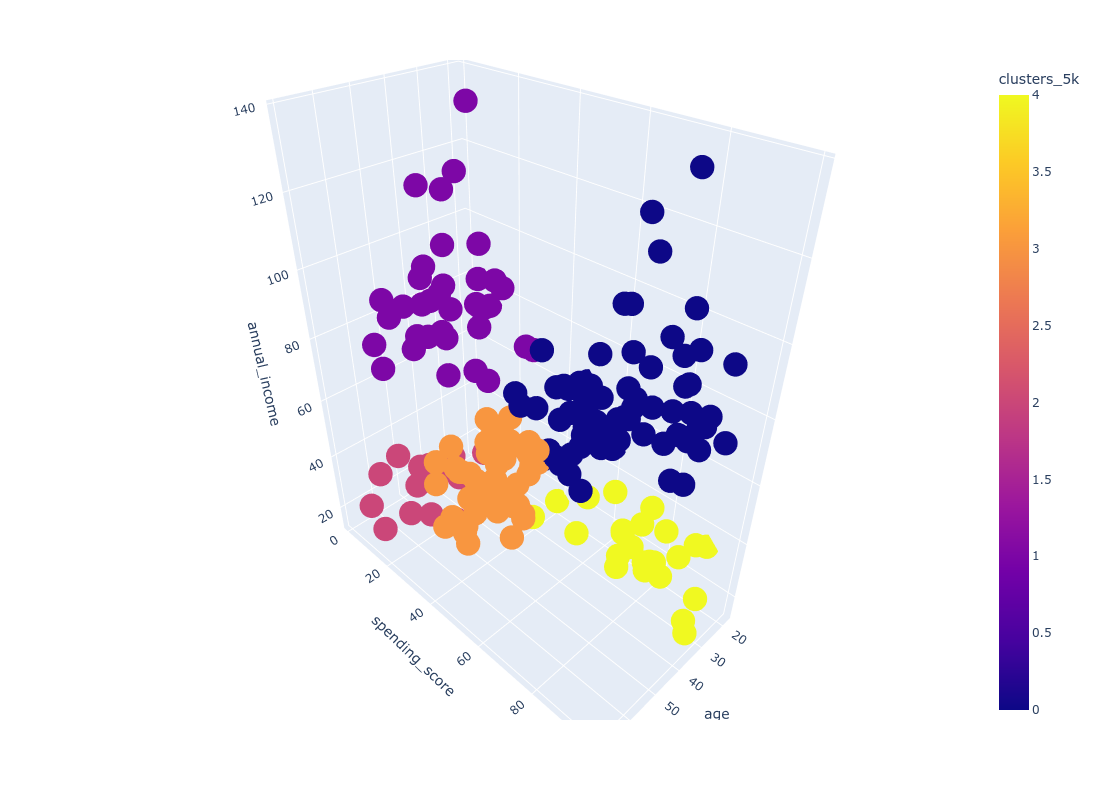

In [12]:
fig = px.scatter_3d(data, x='age', y='spending_score', z='annual_income',color='clusters_5k', height=800, width=800) 
fig.write_html("file5k.html")
fig.show()

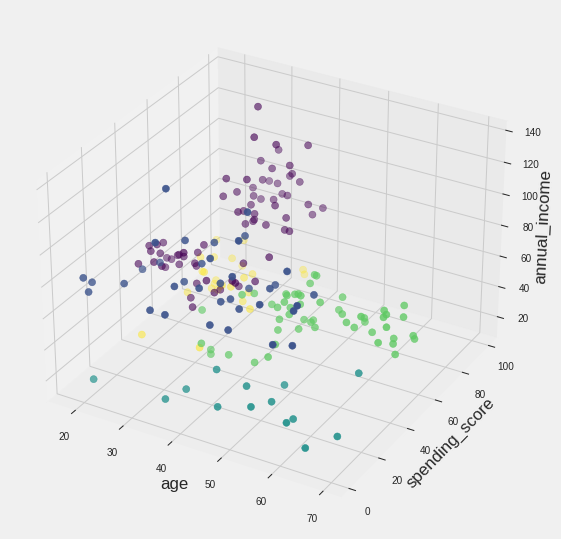

In [13]:
# El gráfico 3D interactivo anterior no se muestra en GitHub
# Por eso, el siguiente gráfico
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection = '3d')

x = data['age']
y = data['spending_score']
z = data['annual_income']

ax.set_xlabel("age")
ax.set_ylabel('spending_score')
ax.set_zlabel("annual_income")

ax.scatter(x, y, z, c=labels_5k, s= 50, cmap='viridis')

plt.show()

### Clientes Segmentados

In [14]:
#data.to_csv('clusterized4_data.csv')
data.sample(18)

age  annual_income  spending_score  clusters_4k  clusters_5k
153   38             78              76            2            0
59    53             46              46            0            3
84    21             54              57            2            0
40    65             38              35            0            2
36    42             34              17            0            2
54    50             43              45            0            3
101   49             62              48            0            3
115   19             65              50            2            0
9     30             19              72            3            4
130   47             71               9            1            1
51    33             42              60            2            0
104   49             62              56            2            3
25    29             28              82            3            4
61    19             46              55            2            0
52    31             43              54            2            0
16    35             21              35            0            3
86    55             57              58            0            3
1     21             15              81            3            4